<a href="https://colab.research.google.com/github/suraanjali/gituhubtest1/blob/main/filter_audio_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt
from glob import glob
import IPython.display as ipd

In [37]:
import librosa

audio_file, sr = librosa.load("/content/Speaker26_018.wav")
ipd.Audio(audio_file, rate=sr)


In [89]:
y,sr = librosa.load(audio_file)

TypeError: Invalid file: array([ 0.00097656, -0.00091553, -0.00128174, ..., -0.00457764,
       -0.00418091, -0.00357056], dtype=float32)

In [39]:
y

array([  32,  -30,  -42, ..., -150, -137, -117], dtype=int16)

In [72]:
sr

22050

In [41]:
print(f"{y}")

[  32  -30  -42 ... -150 -137 -117]


In [74]:
fs = sr
fs

22050

In [76]:
print(f"{fs}")

22050


In [77]:
# creating a time vector for potting
t = np.linspace(0,len(y)/sr,len(y),endpoint = False)

In [81]:
def butter_filter(audio_file,cutoff,fs,order = 4,ftype = 'low'):
  nyq = 0.5*sr
  normal_cutoff = cutoff /nyq
  b,a = butter(order,normal_cutoff,btype = ftype)
  return filtfilt(b,a,audio_file)

In [91]:
# apply low passed filter
low_passed = butter_filter(audio_file, cutoff=1000, fs = sr, ftype='low')



In [83]:
high_passed = butter_filter(y, cutoff=1000, fs=sr, ftype='high')

Text(0.5, 1.0, 'Original Audio Signal')

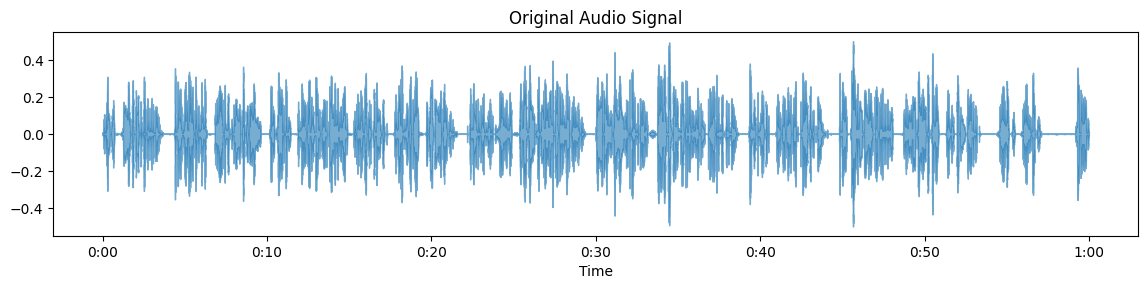

In [84]:
plt.figure(figsize=(14, 9))

plt.subplot(3, 1, 1)
librosa.display.waveshow(audio_file, sr=sr, alpha=0.6)
plt.title("Original Audio Signal")

Text(0.5, 1.0, 'Low-Pass Filtered Audio (<1000 Hz)')

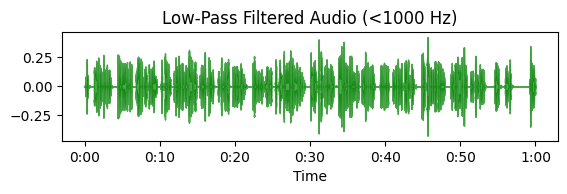

In [85]:
plt.subplot(3, 1, 2)
librosa.display.waveshow(low_passed, sr=sr, alpha=0.7, color='green')
plt.title("Low-Pass Filtered Audio (<1000 Hz)")

Text(0.5, 1.0, 'High-Pass Filtered Audio (>1000 Hz)')

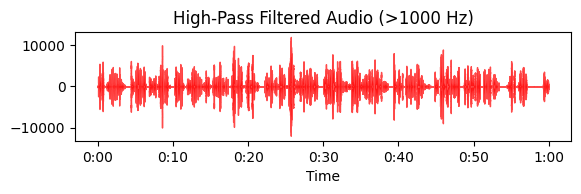

In [86]:
plt.subplot(3, 1, 3)
librosa.display.waveshow(high_passed, sr=sr, alpha=0.7, color='red')
plt.title("High-Pass Filtered Audio (>1000 Hz)")


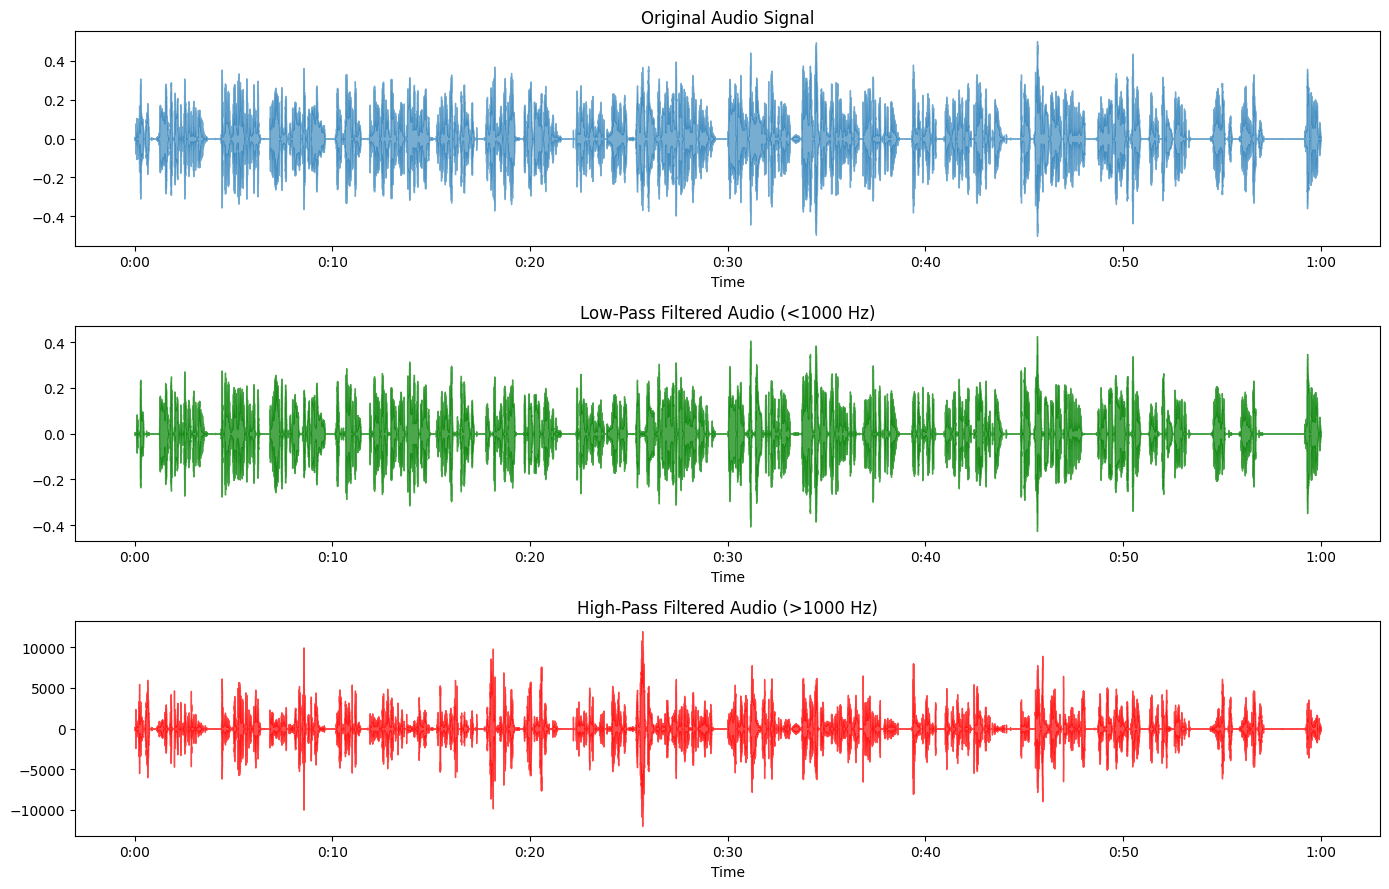

In [88]:
plt.figure(figsize=(14, 9))

plt.subplot(3, 1, 1)
librosa.display.waveshow(audio_file, sr=sr, alpha=0.6)
plt.title("Original Audio Signal")

plt.subplot(3, 1, 2)
librosa.display.waveshow(low_passed, sr=sr, alpha=0.7, color='green')
plt.title("Low-Pass Filtered Audio (<1000 Hz)")

plt.subplot(3, 1, 3)
librosa.display.waveshow(high_passed, sr=sr, alpha=0.7, color='red')
plt.title("High-Pass Filtered Audio (>1000 Hz)")

plt.tight_layout()
plt.show()

